In [1]:
import pandas as pd
import numpy as np
import os
import random
import timeit
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
datadir = '../data/raw'
item_categories = pd.read_csv(os.path.join(datadir, 'item_categories.csv'))
item = pd.read_csv(os.path.join(datadir, 'items.csv'))
train = pd.read_csv(os.path.join(datadir, 'sales_train_v2.csv'))
shops = pd.read_csv(os.path.join(datadir, 'shops.csv'))
test = pd.read_csv(os.path.join(datadir, 'test.csv'))

### Daily Sales

In [3]:
train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
train['date'].dtypes

dtype('O')

In [5]:
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')

In [6]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day

In [7]:
print(train.info())
print("_"*100)
print(train.describe())
print("_"*100)
train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 9 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
year              int64
month             int64
day               int64
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 201.6 MB
None
____________________________________________________________________________________________________
       date_block_num       shop_id       item_id    item_price  item_cnt_day  \
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06   
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00   
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00   
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01   
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day
0,2013-01-02,0,59,22154,999.00,1.0,2013,1,2
1,2013-01-03,0,25,2552,899.00,1.0,2013,1,3
2,2013-01-05,0,25,2552,899.00,-1.0,2013,1,5
3,2013-01-06,0,25,2554,1709.05,1.0,2013,1,6
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1,15


checking leakage

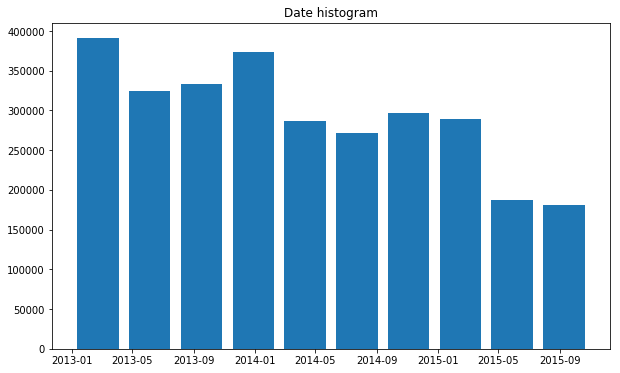

In [8]:
fig = plt.figure(figsize=(10,6))
x = plt.title('Date histogram')
ax = plt.hist(train['date'], rwidth=0.8)

In [9]:
#train['date'].value_counts().sort_index()
train[(train['month'] == 1) & (train['year'] == 2013)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day
0,2013-01-02,0,59,22154,999.00,1.0,2013,1,2
1,2013-01-03,0,25,2552,899.00,1.0,2013,1,3
2,2013-01-05,0,25,2552,899.00,-1.0,2013,1,5
3,2013-01-06,0,25,2554,1709.05,1.0,2013,1,6
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1,15
5,2013-01-10,0,25,2564,349.00,1.0,2013,1,10
6,2013-01-02,0,25,2565,549.00,1.0,2013,1,2
7,2013-01-04,0,25,2572,239.00,1.0,2013,1,4
8,2013-01-11,0,25,2572,299.00,1.0,2013,1,11
9,2013-01-03,0,25,2573,299.00,3.0,2013,1,3


In [12]:
train['item_cnt_day'].value_counts()

 1.0      2629372
 2.0       194201
 3.0        47350
 4.0        19685
 5.0        10474
-1.0         7252
 6.0         6338
 7.0         4057
 8.0         2903
 9.0         2177
 10.0        1820
 11.0        1263
 12.0        1083
 13.0         918
 14.0         716
 15.0         638
 16.0         544
 17.0         438
 18.0         391
 20.0         364
 19.0         347
 21.0         290
 22.0         242
 24.0         204
 23.0         198
 25.0         180
 26.0         176
 30.0         147
 28.0         131
 27.0         130
           ...   
 95.0           1
 96.0           1
 102.0          1
 105.0          1
 109.0          1
 112.0          1
 113.0          1
 118.0          1
 128.0          1
 129.0          1
 131.0          1
 132.0          1
 135.0          1
 146.0          1
 200.0          1
 147.0          1
 149.0          1
 153.0          1
 154.0          1
 156.0          1
 157.0          1
 504.0          1
 163.0          1
 164.0          1
 167.0    